<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [47]:
from google.colab import files
uploaded=files.upload()

Saving Amazon Reviews with Ratings.csv to Amazon Reviews with Ratings (1).csv


In [48]:
df = pd.read_csv("Amazon Reviews with Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Reviews         2000 non-null object
Star_Ratings    2000 non-null int64
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [49]:
df_new= df.dropna(how = 'all')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Reviews         2000 non-null object
Star_Ratings    2000 non-null int64
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


#Explore Data


In [50]:
#Explore Data
df_new.shape
type(df_new)
df_new.size
df_new.shape
df_new.head()
df_new.tail()

(2000, 2)

pandas.core.frame.DataFrame

4000

(2000, 2)

,Reviews,Star_Ratings
0,Best Display in Market!,5
1,Awesome purchase,5
2,Picture Quality and Slow Motion Video Recordin...,2
3,Overpriced to the cheap quality,1
4,Unhappy with one plus,3


,Reviews,Star_Ratings
1995,waste of money,1
1996,"The smooth and seamless performance, immersive...",5
1997,Excellent phone,5
1998,Display problem,1
1999,Great mobile,5


In [51]:
df_new.Star_Ratings.value_counts()

5    1254
4     362
1     199
3     117
2      68
Name: Star_Ratings, dtype: int64

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

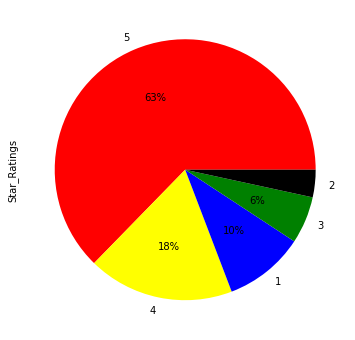

In [53]:
df_new.Star_Ratings.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow","blue","green","black"])

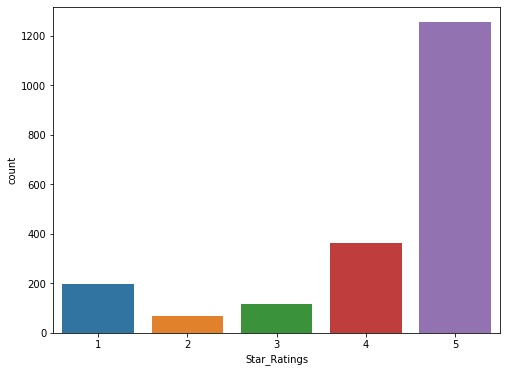

In [54]:
sns.countplot(x = 'Star_Ratings',data=df_new)

In [55]:
df_new['Ratings_category'] = df_new['Star_Ratings'].apply(lambda Ratings: 'positive' if Ratings > 3 else 'negative')
df_new.head()

,Reviews,Star_Ratings,Ratings_category
0,Best Display in Market!,5,positive
1,Awesome purchase,5,positive
2,Picture Quality and Slow Motion Video Recordin...,2,negative
3,Overpriced to the cheap quality,1,negative
4,Unhappy with one plus,3,negative


In [56]:

word_list = []

max = len(df_new.Reviews)
max
for i in range (max):
  R1= df_new.Reviews[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]



 


2000

2000


[['best', 'display', 'in', 'market!'],
 ['awesome', 'purchase'],
 ['picture',
  'quality',
  'and',
  'slow',
  'motion',
  'video',
  'recording',
  'blanking',
  'problem'],
 ['overpriced', 'to', 'the', 'cheap', 'quality'],
 ['unhappy', 'with', 'one', 'plus']]

In [57]:
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(word_list)
words_freq.most_common(20)

Most commonly occuring words and frequency



TypeError: ignored

In [0]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "CRIMSON")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='WHITE',
                      max_words=20
                         ).generate(word_string)

In [0]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111 (1).csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [61]:
print(lexicons)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [62]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

2

In [63]:
df_new['sentiment_score'] = sentiment_score
df_new.head()

,Reviews,Star_Ratings,Ratings_category,sentiment_score
0,Best Display in Market!,5,positive,3
1,Awesome purchase,5,positive,4
2,Picture Quality and Slow Motion Video Recordin...,2,negative,-2
3,Overpriced to the cheap quality,1,negative,0
4,Unhappy with one plus,3,negative,-2


In [0]:
df_new['Pred_Ratings_category'] = df_new['sentiment_score'].apply(lambda sentiment_score: 'positive' if sentiment_score > 0 else 'negative')
df_new.head(3)

In [75]:
df_1 = df_new[['sentiment_score','Star_Ratings']]
df_1.head()

,sentiment_score,Star_Ratings
0,3,5
1,4,5
2,-2,2
3,0,1
4,-2,3


In [0]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [68]:
x = df_1.iloc[:, 1]
x.head()


0    5
1    5
2    2
3    1
4    3
Name: Star_Ratings, dtype: int64

In [69]:
y = df_1.iloc[:, -1]
y.head()

0    5
1    5
2    2
3    1
4    3
Name: Star_Ratings, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [72]:
x_train.shape
x_test.shape

(1200,)

(800,)

In [74]:
lm.fit(x_train,y_train)

ValueError: ignored

# KNN model

In [0]:
x_train.shape

In [0]:
x_test.shape

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

## Comparing Error Rate with the K Value


In [0]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [0]:
affin_df.groupby(affin_score).size()

In [0]:
afinn_df.head()

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
#Plot the histogram of the affin_score
affin_df.hist(bins=[-6,0,18], ax=ax, color = '#2B2CBA')
plt.title

In [0]:
df['Affin_score'] = df['afinn'].apply(lambda score: 'positive' if score > 0 else 'negative')
df.head()

In [0]:
df.shape

In [0]:
affin_df.shape